In [1]:
import sys
import os
import matplotlib.pyplot as plt

# Add the src directory to the path. TEMPORARY FIX
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "../..")))

from src.data_processing.data_loader import CoastData
from src.data_processing.dataset_preprocessor import DatasetPreprocessor

In [11]:
data_path = os.path.abspath(os.path.join(os.getcwd(), "../../data/raw/SCLabels_v1.0.0/"))

# Load the data, all the different stations
data = CoastData(data_path, name="cies")

filtered_data = data.get_images_and_masks() 

filtered_data = data.split_data()

# Get the first image and mask
image_path = filtered_data['train']['X'][0]
mask_path = filtered_data['train']['y'][0]

print("Image:", image_path)
print("Mask:", mask_path)

CoastData: cies - 430 images
Coast: cies, Total size: 430
Image: /Users/josep/Documents/SOCIB/Shoreline-extraction/data/raw/SCLabels_v1.0.0/images/1667995920.Wed.Nov.09_13_12_00.CET.2022.cies.image.jpg
Mask: /Users/josep/Documents/SOCIB/Shoreline-extraction/data/raw/SCLabels_v1.0.0/masks/1667995920.Wed.Nov.09_13_12_00.CET.2022.cies.mask.png


Image shape: (213, 901, 3)
Mask shape: (213, 901)
New image shape: (193, 376, 3)
New mask shape: (193, 376)


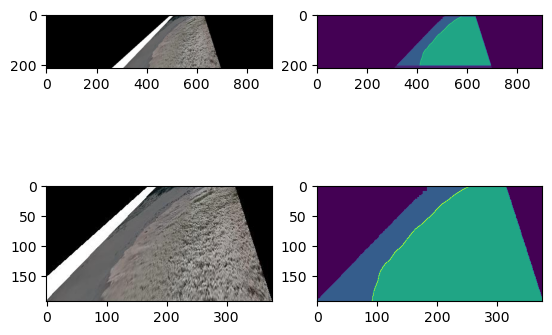

In [12]:

dataset_preprocessor = DatasetPreprocessor()

image = dataset_preprocessor.load_image(image_path)
mask = dataset_preprocessor.load_mask(mask_path)

print("Image shape:", image.shape)
print("Mask shape:", mask.shape)

new_image, new_mask = dataset_preprocessor.process_image(image, mask)

print("New image shape:", new_image.shape)
print("New mask shape:", new_mask.shape)

fig, ax = plt.subplots(2, 2)


ax[0][0].imshow(image)
ax[0][1].imshow(mask)

ax[1][0].imshow(new_image)
ax[1][1].imshow(new_mask)

plt.show()

In [ ]:
# Preprocess all the dataset
new_data_path = os.path.abspath(os.path.join(os.getcwd(), "../../data/processed/"))

dataset_preprocessor = DatasetPreprocessor()

dataset_preprocessor.preprocess(dataset_path=data_path, dataset_output_path=new_data_path)